SETUP OR FETCH OUR ENVIRONMENT VARIABLES

In [7]:
import os
from dotenv import load_dotenv

# Load .env file
load_dotenv()  # looks for a file named ".env" in the current directory

# Groq (model provider)
groq_key = os.getenv("GROQ_API_KEY")
if groq_key is None:
    raise ValueError("GROQ_API_KEY not found in .env")
os.environ["GROQ_API_KEY"] = groq_key

# Search API keys
tavily_key = os.getenv("TAVILY_API_KEY")
if tavily_key is None:
    raise ValueError("TAVILY_API_KEY not found in .env")
os.environ["TAVILY_API_KEY"] = tavily_key

serper_key = os.getenv("SERPER_API_KEY")
if serper_key is None:
    raise ValueError("SERPER_API_KEY not found in .env")
os.environ["SERPER_API_KEY"] = serper_key

print("All API keys loaded and set!")


All API keys loaded and set!


In [8]:
from langchain.chat_models import init_chat_model

# Use Groq LLM

model = init_chat_model(
    model = 'groq:llama-3.3-70b-versatile', #LLm for tool calling
    temperature =0.3 # how much creative the model to be
)

print("LLM Initialized:",model)

LLM Initialized: profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True} client=<groq.resources.chat.completions.Completions object at 0x000002AB853CE600> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002AB85161BB0> model_name='llama-3.3-70b-versatile' temperature=0.3 model_kwargs={} groq_api_key=SecretStr('**********')


SEARCH FUNCTIONALITY

In [9]:
from langchain_tavily import TavilySearch

tavily_search = TavilySearch(
    max_results=5,
    topic="general",
   )

print("Tavily Search Tool ready")  

Tavily Search Tool ready


In [16]:
tavily_search.invoke({"query": "What happened at the last wimbledon?"})


{'query': 'What happened at the last wimbledon?',
 'response_time': 0.66,
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.atptour.com/en/news/wimbledon-2025-results',
   'title': 'What were the Wimbledon results? | ATP Tour | Tennis',
   'content': "# ATP Tour. #### TOURNAMENT RESULTS. #### PLAYER RESULTS. ## What were the Wimbledon results? Jannik Sinner sank his great rival Carlos Alcaraz on Sunday evening at Wimbledon to become the first Italian to lift a singles trophy at the grass major. **Read More from Wimbledon:**  Sinner gains Alcaraz revenge, wins first Wimbledon crown. Sinner claws closer to Alcaraz in Big Titles chase with Wimbledon triumph. ### Read More News View All News. * {{player.ranking}} Rank {{opponent.ranking}}. player.Age : '-'}} Age {{opponent.Age ? * {{getWeightInLB.player}} Weight {{getWeightInLB.opponent}}. * {{getHeightInFeetInch.player}} Height {{getHeightInFeetInch.opponent}}. * {{getPlayHand.player}} Plays {

In [15]:
# res=tavily_search.invoke({"query": "What happened at the last wimbledon?"})

# print(res)

{'query': 'What happened at the last wimbledon?', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.atptour.com/en/news/wimbledon-2025-results', 'title': 'What were the Wimbledon results? | ATP Tour | Tennis', 'content': "# ATP Tour. #### TOURNAMENT RESULTS. #### PLAYER RESULTS. ## What were the Wimbledon results? Jannik Sinner sank his great rival Carlos Alcaraz on Sunday evening at Wimbledon to become the first Italian to lift a singles trophy at the grass major. **Read More from Wimbledon:**  Sinner gains Alcaraz revenge, wins first Wimbledon crown. Sinner claws closer to Alcaraz in Big Titles chase with Wimbledon triumph. ### Read More News View All News. * {{player.ranking}} Rank {{opponent.ranking}}. player.Age : '-'}} Age {{opponent.Age ? * {{getWeightInLB.player}} Weight {{getWeightInLB.opponent}}. * {{getHeightInFeetInch.player}} Height {{getHeightInFeetInch.opponent}}. * {{getPlayHand.player}} Plays {{getPlayHand.opponent}}. Get offic

In [10]:
from langchain_community.utilities import GoogleSerperAPIWrapper

google_search = GoogleSerperAPIWrapper()

print("Google Serper Wrapper Ready")

Google Serper Wrapper Ready


Test google serper

In [11]:
result = google_search.run("Best places to visit in Dubai")
print(result)

Top Attractions in Dubai ; 1. Aquaventure Waterpark · 4.5. (24,679) ; 2. Burj Khalifa · 4.5. (78,518) ; 3. The Dubai Mall · 4.5. (31,982) ; 4. AURA SKYPOOL · 4.9. ( ... From the souks to the malls, to the attractions such as a desert safari, Burj Khalifa, Dubai Ain and Creek tour are without a doubt, the very best things to do ... Downtown for Burj Khalifa, Dubai Mall fountain at night, and a short walk around the Opera district. Old Dubai for Al Fahidi, coffee museum, ... Guide to the best hotels and things to do in Dubai. Maps, travel tips and more. Top attractions in Dubai · Dhow Cruise Dubai · Burj Khalifa · The Dubai Yacht · Palm Jumeirah · Dubai Miracle Garden · Dubai Mall · Burj Al Arab. 1) Burj Khalifa : tallest building · 2) Atlantis · 3) Dubai mall · 4) ICE lounge · 5) Desert Safari · 6) Global Village · 7) Mirale Garden and ... Are you looking for the best things to do in Dubai UAE? We just created a list of 25 must do activities for you to do while visiting Dubai! Downtown 

In [19]:
def tavily_search_tool(query:str)-> str:
    """
    Search the web using Tavily for travel info, tips,attractions, etc
    """
    #Call the existing Travely Search tool underneath
    return tavily_search.invoke({"query":query})

def google_serper_search_tool(query:str)->str:
    """
    Search the web using Google Serper for up to date travel info
    """

    return google_search.run(query)

In [20]:
tavily_search_tool("Plan a trip to Hyderabad")

{'query': 'Plan a trip to Hyderabad',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://revolvingcompass.com/a-crisp-4-days-hyderabad-trip-plan-for-family/',
   'title': 'A crisp 4 days Hyderabad trip plan for family',
   'content': 'Our 4 days Hyderabad trip plan for family · Day 1: Bangalore to Hyderabad road trip · Day 2: Exploring old Hyderabad city · Day 3: Off to Ramoji',
   'score': 0.7548612,
   'raw_content': None},
  {'url': 'https://www.quora.com/Can-anyone-plan-a-three-day-Hyderabad-trip',
   'title': 'Can anyone plan a three-day Hyderabad trip? - Quora',
   'content': "* Visit charminar · * Visit Mecca masjid · * Have a Chai at nimra cafe.. Don't miss this · * Visit chowmahalla palace * Try road side food",
   'score': 0.7092009,
   'raw_content': None},
  {'url': 'https://medium.com/illumination/a-short-trip-to-hyderabad-c336745723f8',
   'title': 'A Short Trip to Hyderabad',
   'content': 'A Short Trip to Hyderabad A three-day tr

In [22]:
google_serper_search_tool("Plan a 3 day trip to Hyderabad")

'Invisible Cities  1. Day 1: Workcation in HITEC City & Karachi Bakery Tea.  2. Day 2: Hussain Sagar Boat Ride & Charminar at Midnight.  3. Day 3: Forts, Palaces & The Grand Biryani Finale.  4. Day 3: Quick Stop at Salar Jung Museum & Farewell.  5. Tips for Your Hyderabad 3 Day Itinerary.  6. Wrapping Up Our Hyderabad Trip…'

Create Agents

Travel planner agent is ready!


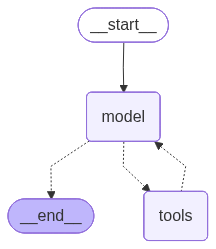

In [24]:
from langchain.agents import create_agent

system_prompt = """
You are a travel planner assistant. User asks travel queries like
'plan my trip to X', 'what to do in Y hotel', etc.
Always use the available web search tools (TavilySearch, GoogleSerperSearch)
to look up latest real-world travel info. Provide a helpful and clear itinerary/answers.
"""

agent = create_agent(
    model = model,
    tools =[tavily_search_tool,google_serper_search_tool],
    system_prompt = system_prompt.strip() # instructions

)

print("Travel planner agent is ready!")
agent

TEST TIME

In [26]:
response = agent.invoke({
    "messages":[
        {
            "role": "user", "content":"Suggest 4 day travel plans to Delhi"
        }
    ]
})

print("Agent Answer:\n")
print(response)

Agent Answer:

{'messages': [HumanMessage(content='Suggest 4 day travel plans to Delhi', additional_kwargs={}, response_metadata={}, id='8c9e562d-90b6-4660-9e7d-630ed1acb446'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '483h92mdr', 'function': {'arguments': '{"query":"4 day travel plan to Delhi"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 'jmztnmwg0', 'function': {'arguments': '{"query":"Delhi travel itinerary 4 days"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 386, 'total_tokens': 431, 'completion_time': 0.108848269, 'completion_tokens_details': None, 'prompt_time': 0.020122172, 'prompt_tokens_details': None, 'queue_time': 0.008228826, 'total_time': 0.128970441}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc

In [28]:
response['messages']

[HumanMessage(content='Suggest 4 day travel plans to Delhi', additional_kwargs={}, response_metadata={}, id='8c9e562d-90b6-4660-9e7d-630ed1acb446'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '483h92mdr', 'function': {'arguments': '{"query":"4 day travel plan to Delhi"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 'jmztnmwg0', 'function': {'arguments': '{"query":"Delhi travel itinerary 4 days"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 386, 'total_tokens': 431, 'completion_time': 0.108848269, 'completion_tokens_details': None, 'prompt_time': 0.020122172, 'prompt_tokens_details': None, 'queue_time': 0.008228826, 'total_time': 0.128970441}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c7024-c209-7f33-88

In [31]:
final_ans= response['messages'][-1].content
print(final_ans)

Here's a suggested 4-day travel plan to Delhi:

Day 1: 
- Start with Jama Masjid 
- Explore Chandni Chowk 
- Visit Red Fort 
- Stop by Raj Ghat 
- End the day with a visit to Humayun's Tomb

Day 2: 
- Visit Qutub Minar 
- Explore the Lotus Temple 
- Spend the evening at Lodhi Garden 

Day 3: 
- Visit the National Museum 
- Stop by Agrasen ki Baoli 
- Explore the Old Delhi morning walk 

Day 4: 
- Visit the India Gate 
- Stop by the Nexus Select CityWalk 
- End the day with a visit to the Pacific Mall

This itinerary provides a mix of historical sites, cultural experiences, and modern attractions, and can be adjusted based on your interests and preferences.
